In [252]:
import numpy as np
import pandas as pd
from sklearn import preprocessing 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [253]:
path = 'C:/Users/mark/Desktop/100Days/part4+mid/data/'
train_x = pd.read_csv(path + 'train.csv', header=None)
train_y = pd.read_csv(path + 'trainLabels.csv', header=None)
test = pd.read_csv(path + 'test.csv', header=None)

#### Data Exploring

In [254]:
train_x.shape

(1000, 40)

In [255]:
train_x.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [256]:
train_x.info()
#皆無missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
0     1000 non-null float64
1     1000 non-null float64
2     1000 non-null float64
3     1000 non-null float64
4     1000 non-null float64
5     1000 non-null float64
6     1000 non-null float64
7     1000 non-null float64
8     1000 non-null float64
9     1000 non-null float64
10    1000 non-null float64
11    1000 non-null float64
12    1000 non-null float64
13    1000 non-null float64
14    1000 non-null float64
15    1000 non-null float64
16    1000 non-null float64
17    1000 non-null float64
18    1000 non-null float64
19    1000 non-null float64
20    1000 non-null float64
21    1000 non-null float64
22    1000 non-null float64
23    1000 non-null float64
24    1000 non-null float64
25    1000 non-null float64
26    1000 non-null float64
27    1000 non-null float64
28    1000 non-null float64
29    1000 non-null float64
30    1000 non-null float64
31    1000 non-null float6

In [257]:
plt.figure()


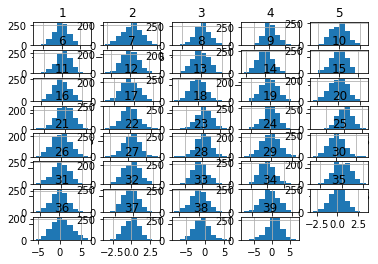

In [258]:
i = 0
for i in range(1,40):
    plt.subplot(8, 5, i)
    train_x[i].hist()
    plt.title(i)
plt.show()
plt.subplots_adjust(hspace = 0.9, wspace =1)

(array([   4.,   14.,   66.,  160.,  243.,  234.,  180.,   76.,   18.,    5.]),
 array([-3.36571093, -2.69651524, -2.02731955, -1.35812385, -0.68892816,
        -0.01973247,  0.64946323,  1.31865892,  1.98785462,  2.65705031,
         3.326246  ]),
 <a list of 10 Patch objects>)

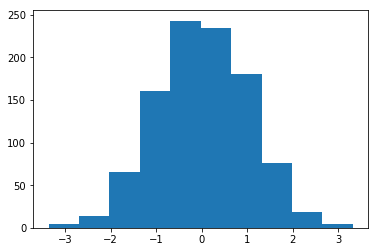

In [259]:
plt.hist(train_x[0])

In [260]:
#進行標準化

train_x = (train_x - train_x.mean()) / (train_x.std())
train_x.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,...,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,8.187895e-18,5.583728e-17,3.486100e-17,-1.931788e-17,1.778577e-16,3.330669e-17,-7.129020e-17,7.938095e-18,-3.641532e-17,-1.065814e-17,...,4.812817e-17,1.043610e-17,7.804868e-17,5.140333e-17,-1.023626e-16,1.110223e-18,-4.818368e-17,-2.120526e-17,-1.196820e-16,-4.385381e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.363449e+00,-3.411950e+00,-2.728515e+00,-3.563044e+00,-3.858751e+00,-3.068358e+00,-3.644531e+00,-2.898951e+00,-3.168609e+00,-2.709581e+00,...,-3.370594e+00,-2.989965e+00,-3.258302e+00,-2.922333e+00,-3.130466e+00,-2.964845e+00,-2.701873e+00,-3.489015e+00,-3.540548e+00,-4.110872e+00
25%,-6.889001e-01,-6.586761e-01,-6.891390e-01,-6.339398e-01,-6.376806e-01,-7.339949e-01,-6.305217e-01,-7.016016e-01,-7.032053e-01,-6.695705e-01,...,-6.821641e-01,-7.179955e-01,-7.051319e-01,-6.386020e-01,-6.579702e-01,-6.715019e-01,-7.302785e-01,-6.996656e-01,-6.565052e-01,-5.742005e-01
50%,2.280521e-03,-8.528738e-03,3.292106e-02,4.738293e-03,-5.056618e-02,3.365680e-02,4.010690e-02,2.539675e-02,-4.294646e-03,-3.207907e-02,...,1.854840e-02,2.679043e-02,-1.150510e-02,-1.612743e-02,-4.746156e-03,4.330070e-03,-5.014221e-02,3.150936e-02,1.839167e-02,8.335274e-02
75%,7.308708e-01,6.959361e-01,7.001487e-01,6.625090e-01,6.060683e-01,6.851548e-01,6.684489e-01,6.612983e-01,7.141587e-01,6.600370e-01,...,7.081329e-01,6.760361e-01,6.615532e-01,6.484215e-01,7.020769e-01,6.538230e-01,6.979614e-01,6.883134e-01,6.337010e-01,6.760129e-01
max,3.273537e+00,3.550529e+00,2.625443e+00,3.184721e+00,3.629350e+00,3.143421e+00,3.348717e+00,3.211092e+00,3.115553e+00,3.870691e+00,...,2.781747e+00,3.660064e+00,3.438875e+00,3.291329e+00,3.059153e+00,3.363496e+00,2.709448e+00,3.493962e+00,3.297086e+00,3.028462e+00


#### Baseline Model : Decision Tree

In [261]:
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size = 0.25, random_state = 42)

In [262]:
#select important variables
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.74


In [263]:
feats.sort_values(ascending = False)

14    0.226410
12    0.162056
39    0.070813
4     0.052301
29    0.047981
6     0.044267
33    0.037689
7     0.037431
24    0.029381
32    0.027505
34    0.025829
1     0.022978
5     0.021057
37    0.019415
18    0.016854
36    0.016368
22    0.014326
3     0.013746
35    0.013444
10    0.012791
30    0.011363
25    0.011018
28    0.010437
15    0.009412
23    0.009340
27    0.007631
13    0.006674
20    0.005028
26    0.005003
8     0.004897
21    0.004006
31    0.002550
11    0.000000
17    0.000000
16    0.000000
38    0.000000
9     0.000000
19    0.000000
2     0.000000
0     0.000000
dtype: float64

In [264]:
feats = pd.Series(data = clf.feature_importances_, index = train_x.columns)
feats = feats.sort_values(ascending = False)
important_var = feats[0:21].index

In [265]:
#use important vars.
train_x_important = train_x[important_var]
x_train, x_test, y_train, y_test = train_test_split(train_x_important, train_y, test_size = 0.25, random_state = 42)

In [266]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.756


#### Model building : Random Forest

In [267]:
train_x_important = train_x[important_var]
x_train, x_test, y_train, y_test = train_test_split(train_x_important, train_y, test_size = 0.25, random_state = 42)

In [268]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train.values.ravel())
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.836


#### Parameters Adjusting

In [278]:
n_estimators = [300, 400, 500]
max_depth = [20, 40, 60]
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 2, 3]

param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

grid_search = GridSearchCV(clf, param_grid, cv =5, n_jobs=-1, verbose=1)

grid_result = grid_search.fit(x_train, y_train.values.ravel())


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  2.7min finished


In [279]:
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Accuracy: 0.885333 using {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}


In [280]:
clf_bestparam = RandomForestClassifier(max_depth=grid_result.best_params_['max_depth'],
                                           n_estimators=grid_result.best_params_['n_estimators'],
                                           min_samples_split = grid_result.best_params_['min_samples_split'],
                                           min_samples_leaf = grid_result.best_params_['min_samples_leaf']
                                      
                                      )

clf_bestparam.fit(x_train, y_train.values.ravel())
y_pred = clf_bestparam.predict(x_test)

In [281]:
acc = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.88


In [286]:
test_std = (test - test.mean()) / (test.std())
test_std = test_std[important_var]
test_pred = clf_bestparam.predict(test_std)


array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [288]:
len(test_pred)

9000

In [307]:
submit = pd.DataFrame()
index_column = np.arange(1,9001)
submit['ID'] = index_column
submit['Solution'] = test_pred

In [310]:
submit

,ID,Solution
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,1
8,9,0
9,10,0


In [311]:
submit.to_csv('submit.csv',index = False)